# 常见激活函数及其在Numpy中的实现与可视化

本笔记将介绍深度学习中几种常见的激活函数。对于每种函数，我们将：
1.  使用 `Numpy` 实现它。
2.  使用 `Matplotlib` 绘制其函数图像和导数图像。
3.  在随后的 Markdown 单元格中，分析其优缺点、相关改进以及在不同神经网络中的应用场景。

## 为什么我们要使用激活函数？

在神经网络中，如果仅仅是由线性层叠加，那么实际上最终仍然等价于一个线性变换。
$$ y_{1} = w_{1}x+b_{1} $$
$$ y_{2} = w_{1}\left ( y_{1} \right ) +b_{1} $$
等价于
$$ y_{2} = w_{1}\left ( w_{1}x+b_{1} \right ) +b_{1} $$
$$ y_{2} = w'x+b'$$
因此，我们需要引入一些更加**特殊**的函数，让我们的网络具有线性表达能力。

## 使用的激活函数应该具有什么特性？

- 单调可微：一般情况下，在更新神经网络的参数时，我们使用的都是**反向传播**中的**梯度下降算法**，这一算法依赖于**求导**这一重要算法。因此，我们必须要求激活函数可微，而单调递增的函数导数函数值一定大于零，这是有利于我们计算的。（因为**激活**这一重要特性，我们需要的是单调增函数）
- 非线性：因为线性模型的表达能力不够，即从数据输入到与**权值（$w_{k}$）**求和加**偏置($b_{k}$)**。所以我们要求激活函数是非线性的，这样才能帮助神经网络表达更加复杂的数据分布。


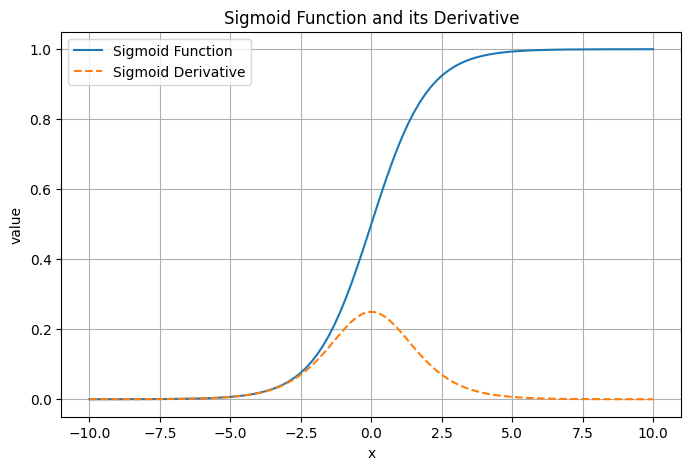

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 定义 Sigmoid 函数的导数
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# 生成数据
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
dy = sigmoid_derivative(x)

# 绘制图形
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Sigmoid Function')
plt.plot(x, dy, label='Sigmoid Derivative', linestyle='--')
plt.title('Sigmoid Function and its Derivative')
plt.xlabel('x')
plt.ylabel('value')
plt.grid(True)
plt.legend()
plt.show()

### Sigmoid 函数

**数学公式:**
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

**优点:**
- **输出范围有限：** 函数输出值在 (0, 1) 之间，可以被解释为概率，这在二分类问题的输出层中非常有用。
- **平滑性：** Sigmoid 函数是连续可导的，其平滑的导数有助于梯度下降算法的稳定性。

**缺点与改进:**
- **梯度消失问题（Vanishing Gradients）：** 当输入值非常大或非常小时，Sigmoid 函数的导数趋近于0。在深度网络中，这会导致反向传播时梯度逐层递减，最终使得靠近输入层的网络层权重更新非常缓慢，甚至停止学习。
- **非零中心输出：** Sigmoid 的输出不是以0为中心的（恒为正），这会导致后续网络层的输入是非零均值的，可能会降低梯度下降的收敛速度。
- **计算成本：** 指数运算（`np.exp()`）相对于其他激活函数（如ReLU）计算成本更高。

**改进方向：**
- 为了解决梯度消失和非零中心问题，后续的激活函数如 **Tanh** 和 **ReLU** 被提出。Tanh 将输出中心化到0，而ReLU在正数区间的导数恒为1，有效缓解了梯度消失。

**在机器学习网络中的应用:**
- **传统应用：** 在早期的多层感知机（MLP）和神经网络中被广泛用作隐藏层激活函数。
- **现代应用：** 由于其缺点，现在很少在深度网络的隐藏层中使用。其主要应用场景是**二元分类（Binary Classification）**问题的输出层，用于输出一个介于0和1之间的概率值。例如，在逻辑回归模型中，Sigmoid 是其核心组成部分。

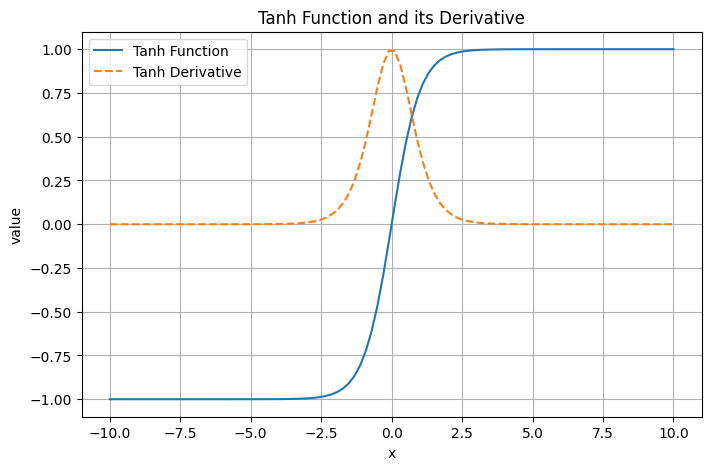

In [2]:
# 定义 Tanh 函数
def tanh(x):
    return np.tanh(x)

# 定义 Tanh 函数的导数
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# 生成数据
x = np.linspace(-10, 10, 100)
y = tanh(x)
dy = tanh_derivative(x)

# 绘制图形
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Tanh Function')
plt.plot(x, dy, label='Tanh Derivative', linestyle='--')
plt.title('Tanh Function and its Derivative')
plt.xlabel('x')
plt.ylabel('value')
plt.grid(True)
plt.legend()
plt.show()

### Tanh (双曲正切) 函数

**数学公式:**
$$ \text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

**优点:**
- **零中心输出：** Tanh 函数的输出范围是 (-1, 1)，以0为中心。这使得它通常比 Sigmoid 函数收敛更快，因为下一层的输入是零均值的，梯度更新更为均衡。
- **更陡的梯度：** 在0附近，Tanh 的导数比 Sigmoid 更大（最大为1，而Sigmoid为0.25），这有助于在训练初期更快地传递梯度。

**缺点与改进:**
- **梯度消失问题：** 与 Sigmoid 类似，Tanh 在输入的绝对值很大时也会饱和，导数趋近于0，从而引发梯度消失问题，尽管其梯度消失区域的到来比 Sigmoid 稍晚。

**改进方向：**
- **ReLU** 及其变体（如 Leaky ReLU, ELU）的出现，旨在从根本上解决饱和激活函数（如 Tanh 和 Sigmoid）的梯度消失问题。

**在机器学习网络中的应用:**
- **循环神经网络（RNNs）：** Tanh 是传统 RNN（包括 LSTM 和 GRU 单元）中非常常见的激活函数。由于其零中心的特性，它在处理序列数据时能更好地维持信息的流动和梯度的传播。
- **早期的多层感知机（MLPs）：** 在 ReLU 流行之前，Tanh 因其优于 Sigmoid 的性能，常被用作隐藏层的激活函数。在现代深度网络中，它在隐藏层的使用已基本被 ReLU 及其变体取代。

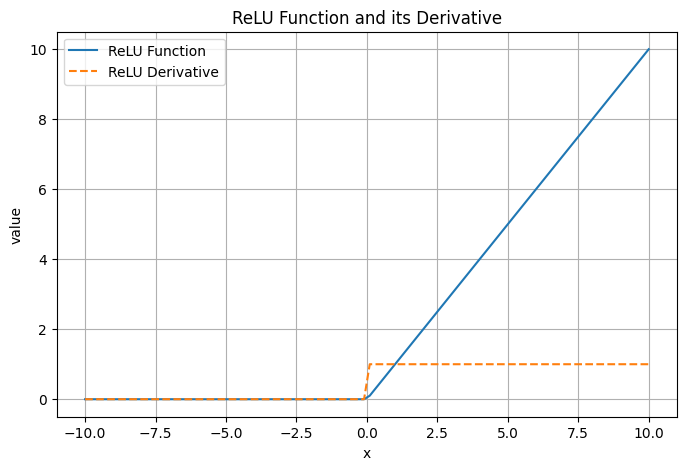

In [3]:
# 定义 ReLU 函数
def relu(x):
    return np.maximum(0, x)

# 定义 ReLU 函数的导数
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 生成数据
x = np.linspace(-10, 10, 100)
y = relu(x)
dy = relu_derivative(x)

# 绘制图形
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='ReLU Function')
plt.plot(x, dy, label='ReLU Derivative', linestyle='--')
plt.title('ReLU Function and its Derivative')
plt.xlabel('x')
plt.ylabel('value')
plt.grid(True)
plt.legend()
plt.show()

### ReLU (Rectified Linear Unit) 函数

**数学公式:**
$$ \text{ReLU}(x) = \max(0, x) $$

**优点:**
- **解决梯度消失问题：** 在正数区间，ReLU 的导数恒为1，这使得梯度可以无衰减地在网络中传播，极大地缓解了深度网络中的梯度消失问题。
- **计算效率高：** ReLU 的计算非常简单（一个 `max(0, x)` 操作），远快于 Sigmoid 和 Tanh 中的指数运算，能显著加速网络的训练和推理。
- **引入稀疏性：** 对于负数输入，ReLU 的输出为0，这会使网络中的一部分神经元输出为0，从而形成稀疏表示。这种稀疏性可以提高模型的泛化能力，并可能有助于特征解耦。

**缺点与改进:**
- **非零中心输出：** 和 Sigmoid 类似，ReLU 的输出也是非零均值的。
- **Dying ReLU 问题（神经元死亡）：** 如果一个神经元的输入在训练过程中持续为负，那么该神经元的梯度将永远为0，导致其权重无法更新。这种情况一旦发生，该神经元就“死亡”了，不再对任何数据产生响应。这通常由不当的权重初始化或过大的学习率引起。

**改进方向：**
- **Leaky ReLU / Parametric ReLU (PReLU)：** 为了解决 Dying ReLU 问题，Leaky ReLU 为负数输入分配了一个很小的正斜率（如0.01），使得负数区间的梯度不再为0。PReLU 更进一步，将这个斜率作为一个可学习的参数。
- **ELU (Exponential Linear Unit)：** ELU 在负数区具有平滑的饱和特性，输出均值更接近0，通常能带来更快的收敛和更好的泛化，但计算成本更高。
- **GELU / Swish 等：** 更平滑的 ReLU 变体，在一些大型模型（如Transformer）中表现更优。

**在机器学习网络中的应用:**
- **现代深度学习的默认选择：** ReLU 是目前绝大多数深度神经网络（尤其是**卷积神经网络 CNN** 和**深度前馈网络**）隐藏层的首选激活函数。它的简洁性和有效性使其成为构建深度模型的基石。

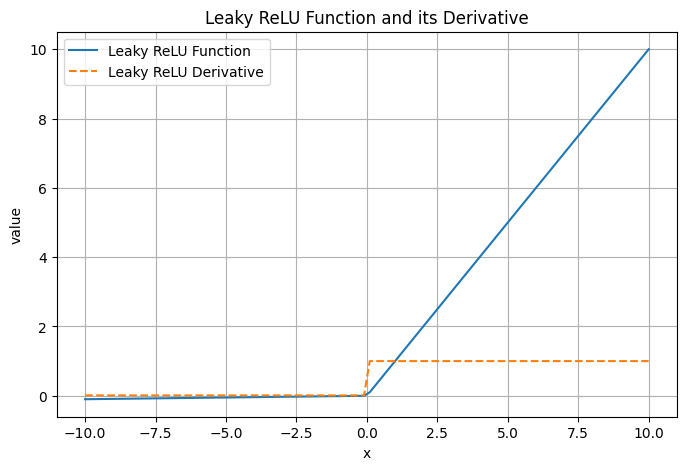

In [4]:
# 定义 Leaky ReLU 函数
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# 定义 Leaky ReLU 函数的导数
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# 生成数据
x = np.linspace(-10, 10, 100)
y = leaky_relu(x)
dy = leaky_relu_derivative(x)

# 绘制图形
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Leaky ReLU Function')
plt.plot(x, dy, label='Leaky ReLU Derivative', linestyle='--')
plt.title('Leaky ReLU Function and its Derivative')
plt.xlabel('x')
plt.ylabel('value')
plt.grid(True)
plt.legend()
plt.show()

### Leaky ReLU 函数

**数学公式:**
$$
\text{Leaky ReLU}(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \le 0 
\end{cases}
$$
其中 `α` 是一个小的正常数（例如 0.01）。

**优点:**
- **解决 Dying ReLU 问题：** Leaky ReLU 的核心优点是为负数输入提供了一个小的、非零的梯度（由超参数 `alpha` 控制）。这确保了即使神经元接收到负数输入，其权重也能继续更新，从而避免了神经元“死亡”的问题。
- **保留 ReLU 的大部分优点：** 它依然计算高效（只有一个额外的乘法），并且在正数区间的行为与 ReLU 完全相同，有助于快速收敛。

**缺点与改进:**
- **`alpha` 的选择：** `alpha` 的值需要手动设置，选择一个最优的 `alpha` 可能需要额外的调参工作。通常 `alpha` 被设为一个很小的值，如 0.01。
- **性能不一致：** 尽管 Leaky ReLU 在理论上优于 ReLU，但在实践中，其性能提升并不总是显著或稳定的。有时它的表现可能与 ReLU 相当，甚至略差。

**改进方向：**
- **Parametric ReLU (PReLU)：** PReLU 将 `alpha` 作为一个可学习的参数，让网络在训练过程中自行决定最佳的负斜率。这使得激活函数更具适应性，但增加了模型的参数数量。
- **Randomized Leaky ReLU (RReLU)：** 在训练过程中，`alpha` 从一个给定的范围内的均匀分布中随机抽取，在测试时则使用一个固定的平均值。

**在机器学习网络中的应用:**
- **作为 ReLU 的替代品：** 当怀疑或观察到网络中存在大量的“死亡”神经元时，使用 Leaky ReLU 是一个简单有效的尝试。
- **生成对抗网络（GANs）：** Leaky ReLU 在 GAN 的判别器中被广泛使用，因为它有助于提供更稳定的梯度，防止判别器过快地压倒生成器。
- **通用深度学习模型：** 在各种类型的深度神经网络中，如果 ReLU 的表现不佳，Leaky ReLU 是一个值得尝试的备选方案。